In [6]:
import spotipy
import pandas as pd
import numpy as np
import os

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

from yellowbrick.target import FeatureCorrelation
from yellowbrick.features import Rank2D

import warnings
warnings.filterwarnings("ignore")

from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
import json


In [7]:
artist_Data = pd.read_csv("data/data_by_artist.csv")
genre_Data = pd.read_csv("data/data_by_genres.csv")
year_Data = pd.read_csv("data/data_by_year.csv")
w_genres_Data = pd.read_csv("data/data_w_genres.csv")
Data = pd.read_csv("data/data.csv")

In [8]:
artist_Data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


Each attribute provides insights into different aspects of the tracks, allowing for a comprehensive analysis of their characteristics. Here's a breakdown of each attribute:

mode: This binary attribute indicates the modality of the music track, with 1 representing major and 0 representing minor.

count: This attribute represents the count of occurrences or instances of each track.

acousticness: This attribute measures the acousticness of the track, ranging from 0 to 1, with higher values indicating higher acoustic content.

danceability: This attribute quantifies the danceability of the track, ranging from 0 to 1, with higher values indicating higher danceability.

duration_ms: This attribute denotes the duration of the track in milliseconds.

energy: This attribute represents the energy level of the track, ranging from 0 to 1, with higher values indicating higher energy.

instrumentalness: This attribute quantifies the instrumentalness of the track, ranging from 0 to 1, with higher values indicating a higher likelihood of the track being instrumental.

liveness: This attribute measures the presence of a live audience in the recording, ranging from 0 to 1, with higher values indicating a higher probability of live audience presence.

loudness: This attribute represents the loudness of the track in decibels (dB).

speechiness: This attribute quantifies the presence of spoken words in the track, ranging from 0 to 1, with higher values indicating a higher presence of spoken words.

tempo: This attribute denotes the tempo of the track in beats per minute (BPM).

valence: This attribute quantifies the mood or positivity of the track, ranging from 0 to 1, with higher values indicating a more positive mood.

popularity: This attribute indicates the popularity of the track, typically based on factors such as streaming count or chart rankings.

key: This attribute denotes the key of the track, typically represented as an integer value ranging from 0 to 11, corresponding to different musical keys.

In [9]:
artist_Data.describe()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


In [10]:
genre_Data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [11]:
genre_Data.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000,2973.000000
mean,0.833165,0.401241,0.537187,2.517209e+05,0.561143,0.211366,0.192800,-10.509848,0.083588,119.018723,0.492748,39.919185,5.938782
std,0.372891,0.319760,0.150668,9.465686e+04,0.234486,0.267329,0.092356,5.369202,0.080483,17.469188,0.201820,16.748723,3.368110
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119050,0.441202,2.063788e+05,0.395058,0.004835,0.137687,-12.427656,0.044900,109.198143,0.348578,32.491279,3.000000
50%,1.000000,0.321745,0.546496,2.375453e+05,0.601195,0.080700,0.178764,-9.221817,0.059457,119.194167,0.500048,43.056569,7.000000
75%,1.000000,0.673991,0.647500,2.772720e+05,0.730127,0.343333,0.220856,-6.920125,0.091000,127.508750,0.640257,51.138889,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


In [12]:
year_Data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [13]:
artist_Data.describe()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


In [14]:
w_genres_Data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [15]:
artist_Data.describe()

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.000000,28680.000000,28680.000000,28680.000000,2.868000e+04,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000,28680.000000
mean,0.759170,13.847211,0.498373,0.546490,2.388780e+05,0.497488,0.174756,0.202441,-11.140498,0.094014,115.844830,0.512723,34.060945,5.412901
std,0.427595,53.372544,0.370614,0.176474,1.211318e+05,0.254885,0.298406,0.140884,5.771749,0.111986,25.003834,0.244421,22.376438,3.480552
min,0.000000,1.000000,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.122296,0.431000,1.823304e+05,0.283568,0.000004,0.110362,-13.972292,0.039200,99.366500,0.329000,12.000000,2.000000
50%,1.000000,3.000000,0.478458,0.557000,2.186400e+05,0.504000,0.001880,0.161000,-10.088938,0.052200,115.357400,0.523243,39.000000,6.000000
75%,1.000000,8.000000,0.896000,0.675000,2.684670e+05,0.702783,0.215291,0.247000,-6.889000,0.095300,129.848750,0.703000,51.000000,8.000000
max,1.000000,3169.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000


In [16]:
Data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [17]:
Data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Looking at the datasets I will be using only two of them for the analysis since most contain a repeat of features 

In [18]:
# Rank features 
# Manifold Vizualization
# Feature Importance
# RadViz 


target = 'popularity'
features = Data.columns[Data.columns != target]

In [19]:
features

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'release_date', 'speechiness',
       'tempo'],
      dtype='object')

In [20]:
target

'popularity'

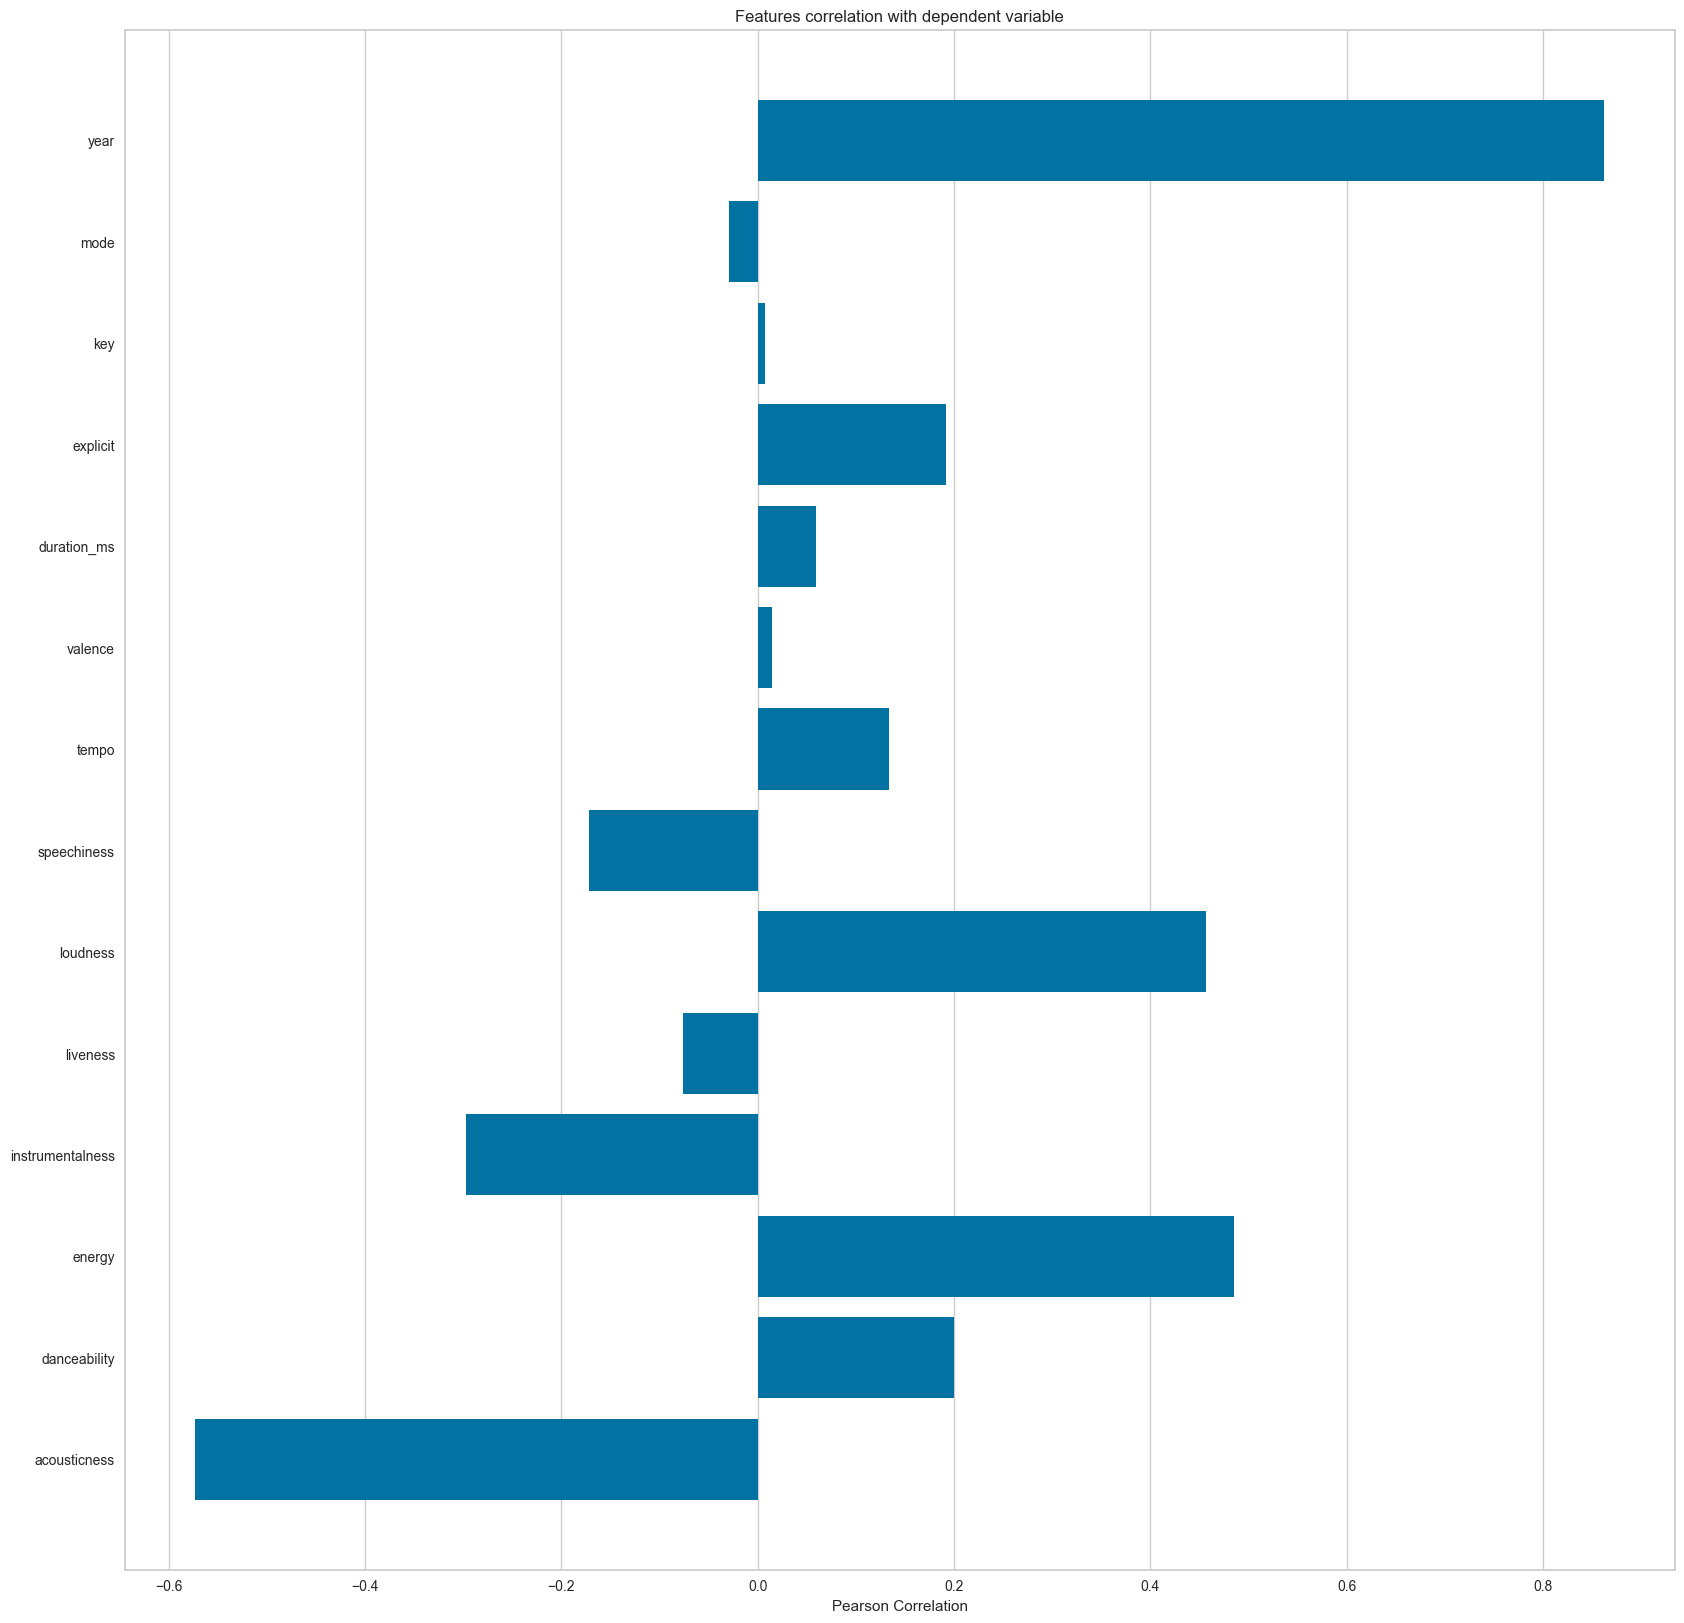

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [21]:
# Feature name only has numercial values

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = Data[feature_names], Data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

The Pearson correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. In this scenario, where the year has the largest correlation with popularity at 0.8 and the largest negative correlation with acousticness at -0.6, these correlation values provide insights into the relationships between these variables.

A correlation coefficient of 0.8 between year and popularity suggests a strong positive linear relationship, indicating that as the year increases, the popularity of music tracks tends to increase as well. This could be attributed to various factors such as changes in music trends, technological advancements impacting music distribution and accessibility, or shifts in cultural preferences over time. A high positive correlation suggests that newer music tends to be more popular compared to older releases.

On the other hand, a correlation coefficient of -0.6 between year and acousticness indicates a strong negative linear relationship. This suggests that as the year increases, the acousticness of music tracks tends to decrease. In other words, newer music tends to have lower acoustic content compared to older music. This could be reflective of changes in music production techniques, advancements in recording technology leading to a shift towards more electronic or synthesized sounds, or evolving preferences among listeners for more produced or polished music.

Overall, these correlation coefficients provide valuable insights into how the variables of year, popularity, and acousticness are related within the dataset. They can help researchers and analysts better understand trends and patterns in music consumption and production over time, contributing to a deeper understanding of the dynamics within the music industry.

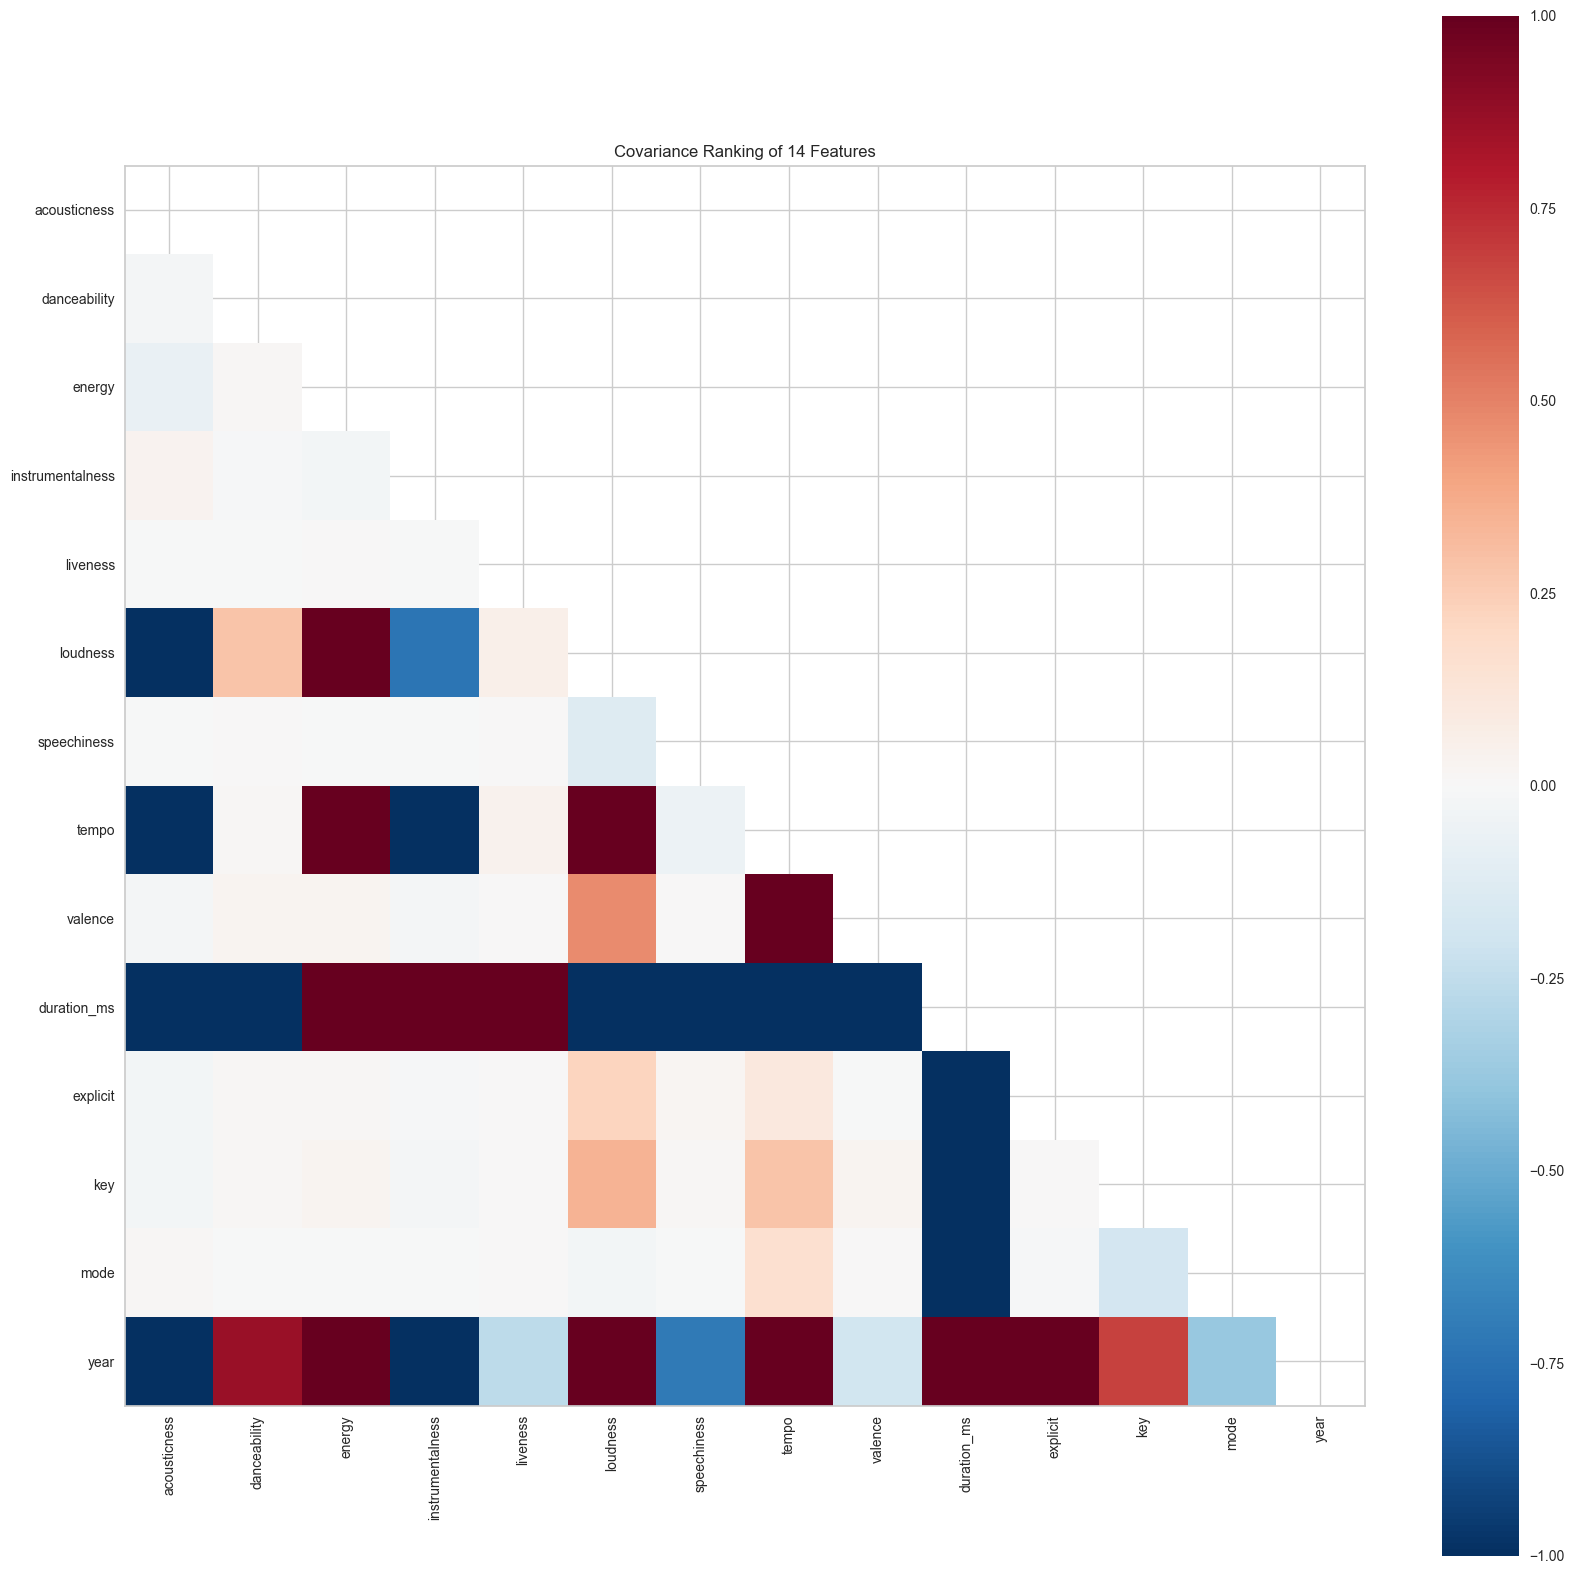

<Axes: title={'center': 'Covariance Ranking of 14 Features'}>

In [22]:


visualizer = Rank2D(features=feature_names, algorithm='covariance')
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()


Covariance is a statistical measure that quantifies the degree to which two variables change together. A covariance ranking involves calculating the covariance between multiple pairs of variables and then ranking them based on the magnitude of their covariance values.

A high positive covariance score indicates that two variables tend to change in the same direction. In other words, when one variable increases, the other variable also tends to increase, and vice versa. This suggests a positive relationship between the variables, where they move together in a coordinated manner. For example, if we observe a high positive covariance between income and spending, it implies that as income increases, spending also tends to increase, and when income decreases, spending decreases as well.

Conversely, a high negative covariance score suggests that two variables tend to change in opposite directions. When one variable increases, the other variable tends to decrease, and vice versa. This indicates a negative relationship between the variables, where they move in opposite directions. For instance, if we find a high negative covariance between temperature and sales of winter clothing, it implies that as temperature rises, the sales of winter clothing tend to decrease, and when temperature falls, the sales of winter clothing increase.

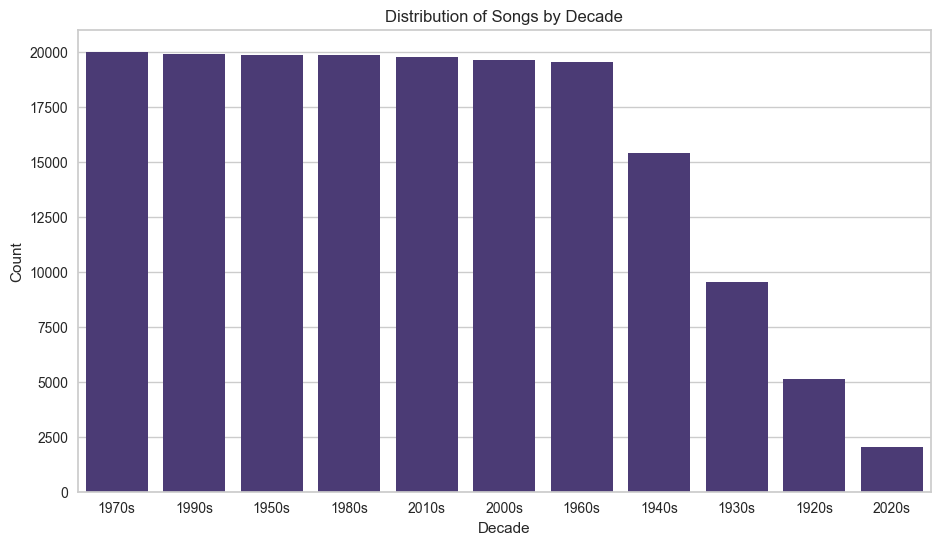

In [23]:


def get_decade(year):
    period_start = (year // 10) * 10
    decade = f'{period_start}s'
    return decade

# Apply the get_decade function to create a new 'decade' column
Data['decade'] = Data['year'].apply(get_decade)


sns.set_palette("viridis")


plt.figure(figsize=(11, 6))
sns.countplot(x='decade', data=Data, order=Data['decade'].value_counts().index)

# Set plot labels and title
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Songs by Decade')

# Show the plot
plt.show()


Based on the above we can see that the most popular songs that there was a drop in 1940, 1930, 1920, and 2020. The music could be due to the lack maintained song information 1920 thru 1940. while 2020 could be due to the time the data set was compiled and released as its only 2024.

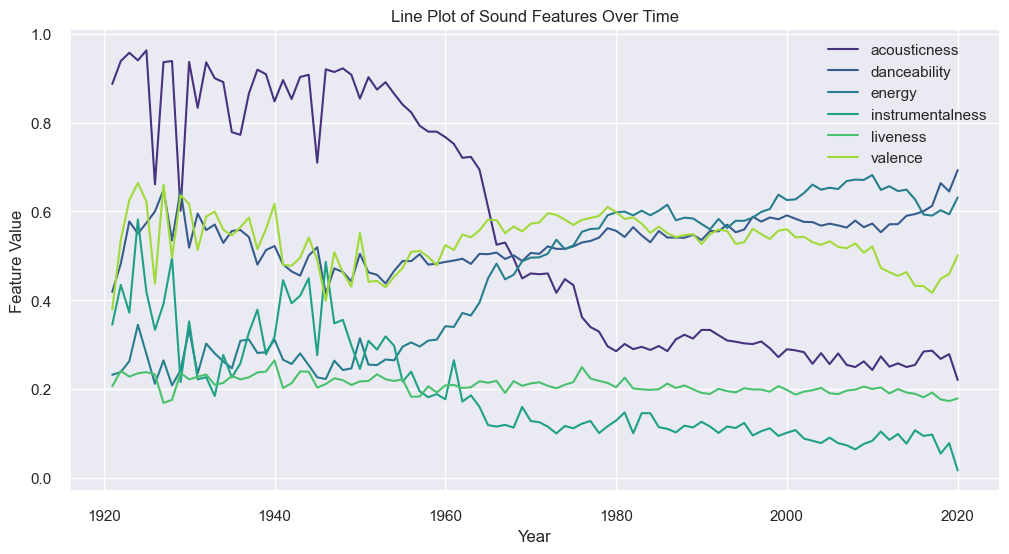

In [24]:
# Set the style and color palette
sns.set(style="darkgrid", palette="viridis")

# Choose the features to plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

# Create a line plot for each feature
plt.figure(figsize=(12, 6))
for feature in sound_features:
    sns.lineplot(x='year', y=feature, data=year_Data, label=feature)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Feature Value')
plt.title('Line Plot of Sound Features Over Time')


plt.legend()


plt.show()


By visualizing multiple features simultaneously over time, we can observe trends, patterns, and relationships between different variables across different time periods. This type of plot is commonly used in time series analysis to track changes in various metrics or indicators over time.

In the above chart it becomes apparent that in the early before the 1960s acousticness was high, a began to dip around the times of the 1970s which could be due to the popularity of electronic music and disco.

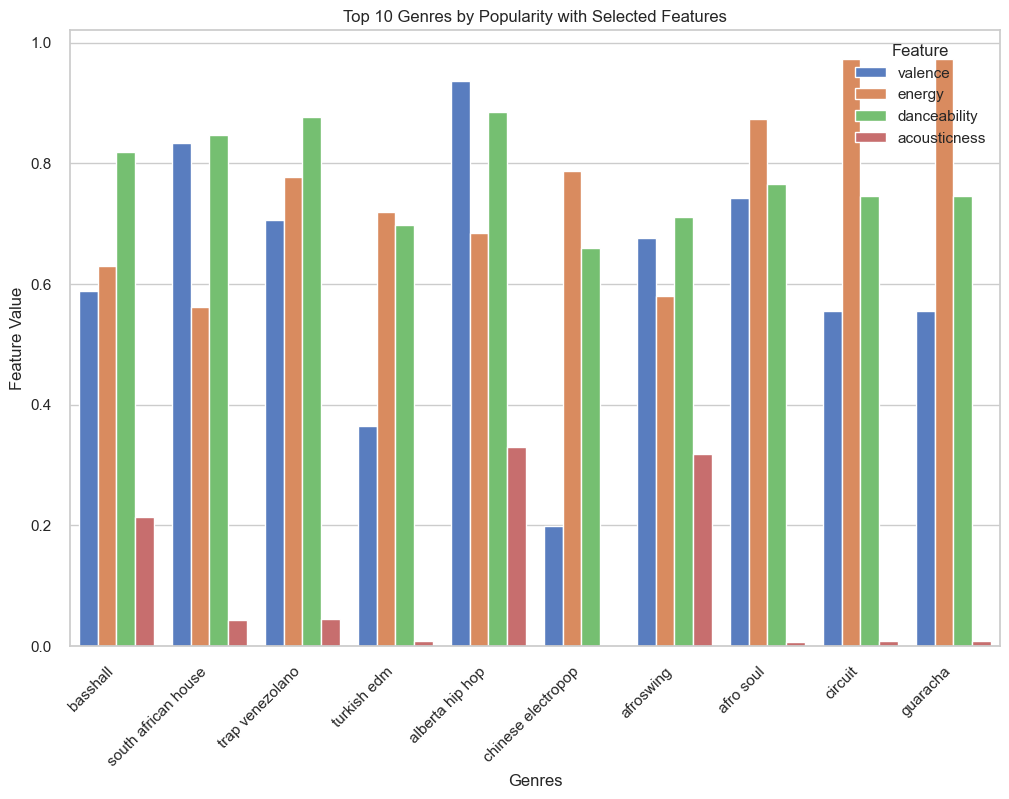

In [25]:


# Select the top 10 genres based on popularity
top10_genres = genre_Data.nlargest(10, 'popularity')

# Set the style and color palette
sns.set(style="whitegrid", palette="muted")

# Melt the DataFrame to have a single column for the feature values
top10_genres_melted = pd.melt(top10_genres, id_vars='genres', value_vars=['valence', 'energy', 'danceability', 'acousticness'])

# Create a bar plot with side-by-side bars for each feature
plt.figure(figsize=(12, 8))
sns.barplot(x='genres', y='value', hue='variable', data=top10_genres_melted, palette="muted")

# Set plot labels and title
plt.xlabel('Genres')
plt.ylabel('Feature Value')
plt.title('Top 10 Genres by Popularity with Selected Features')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Feature')
plt.show()


In [26]:

# kmeans

# Assuming you have a DataFrame 'data' with numeric features
X = genre_Data.select_dtypes(np.number)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (adjust as needed)
num_clusters = 10  # Adjust as needed

# Create KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit and predict cluster labels
song_cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original DataFrame
genre_Data['cluster_label'] = song_cluster_labels.tolist()

In [ ]:
# Clustering Genres 


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.007s...
[t-SNE] Computed neighbors for 2973 samples in 0.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.811306
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.251991
[t-SNE] KL divergence after 1000 iterations: 1.197163


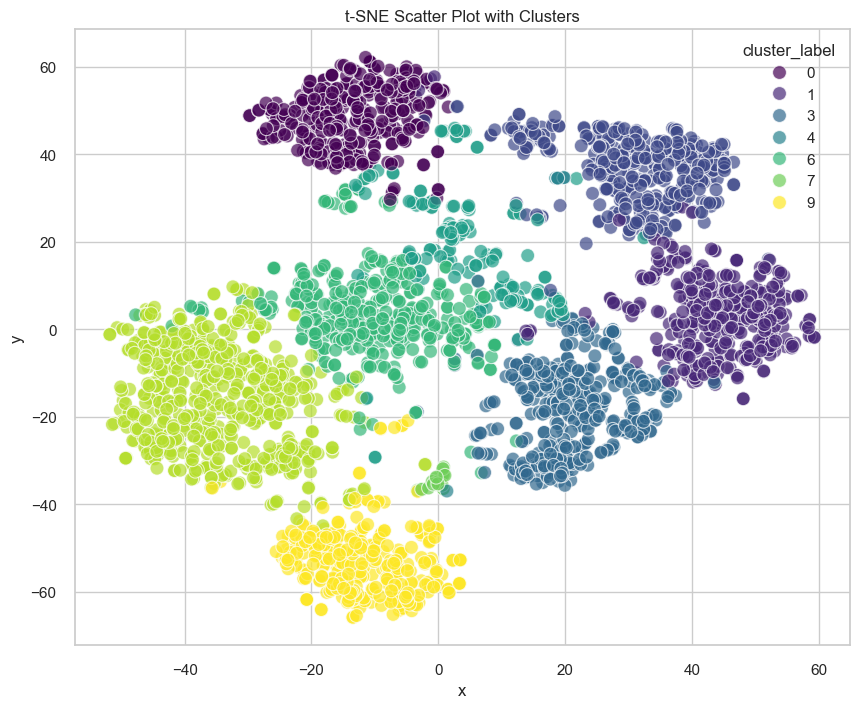

In [27]:


# Assuming you have a DataFrame 'data' with numeric features
X = genre_Data.select_dtypes(np.number)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, verbose=1)
genre_embedding_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for the t-SNE results
projection_tsne = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_tsne)
projection_tsne['genres'] = genre_Data['genres']
projection_tsne['cluster_label'] = genre_Data['cluster_label']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue='cluster_label', data=projection_tsne, palette='viridis', s=100, alpha=0.7)

plt.title('t-SNE Scatter Plot with Clusters')
plt.show()


In [44]:

# Define the pipeline
song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=20, verbose=False))
], verbose=False)

# Extract numerical features
X = Data.select_dtypes(np.number)
number_cols = list(X.columns)

# Fit the scaler and transform the data
X_scaled = song_cluster_pipeline.named_steps['scaler'].fit_transform(X)

# Fit the kmeans model
song_cluster_labels = song_cluster_pipeline.named_steps['kmeans'].fit_predict(X_scaled)

# Add the cluster labels to your original DataFrame
Data['cluster_label'] = song_cluster_labels


In [45]:
Data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s,14
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s,3
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s,2
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s,15
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2020s,8
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2020s,8
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2020s,4
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2020s,0


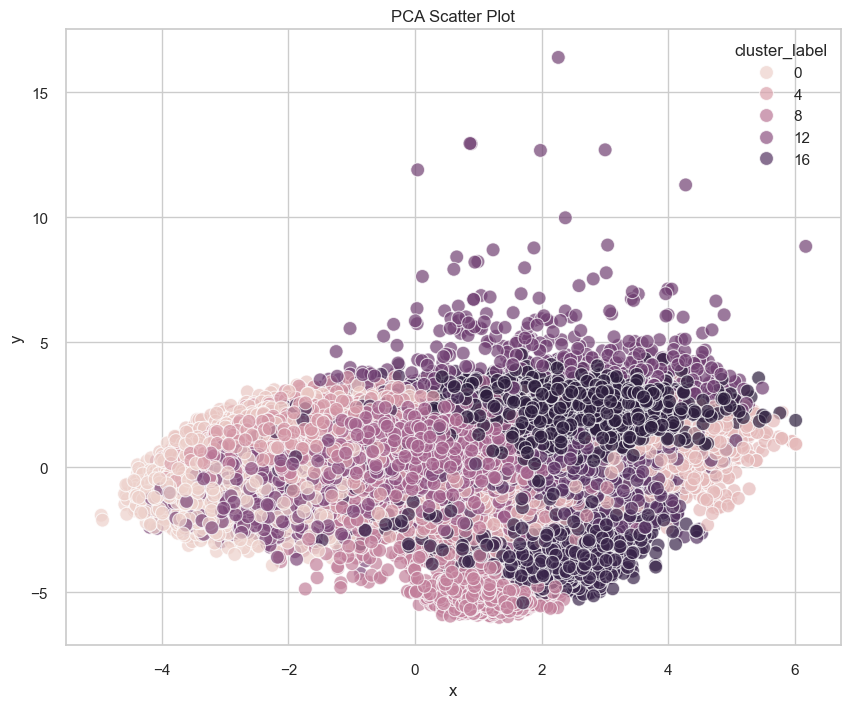

In [46]:


# Assuming you have a DataFrame 'Data' with numeric features
X = Data.select_dtypes(np.number)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
song_embedding_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
projection_pca = pd.DataFrame(columns=['x', 'y'], data=song_embedding_pca)
projection_pca['name'] = Data['name']

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='x', y='y', hue = Data['cluster_label'], data=projection_pca, s=100, alpha=0.7)

plt.title('PCA Scatter Plot')
plt.show()


Based on the analysis and visualizations conducted, it becomes evident that songs belonging to similar genres tend to exhibit data points that are closely clustered together. Furthermore, within these clusters, songs sharing similar attributes and characteristics are also found in close proximity. This observation aligns logically with our understanding of music genres and their inherent characteristics. Songs within the same genre often share similar sound patterns, instrumentation, and lyrical themes, while also originating from comparable time periods. Leveraging this understanding, we can develop a robust recommendation system. By utilizing the data points corresponding to the songs a user has listened to, we can employ clustering algorithms to identify nearby data points representing songs with similar attributes. This approach allows for the recommendation of songs that align closely with the user's musical preferences. To implement such a system, Python developers can utilize Spotipy, a Python client for the Spotify Web API. Spotipy facilitates seamless data retrieval and querying of Spotify's extensive song catalog. To get started, developers need to install Spotipy using pip install spotipy and subsequently create an application on the Spotify Developer's page to obtain a Client ID and secret key for authentication and access to the API. This integration of Spotipy with clustering algorithms offers a powerful framework for building personalized and effective music recommendation systems tailored to individual user preferences.

In [47]:

# Load Spotify API credentials from the configuration file
with open('config.json') as f:
    config = json.load(f)

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config["SPOTIFY_CLIENT_ID"],
                                                           client_secret=config["SPOTIFY_CLIENT_SECRET"]))

def find_song(name, year):
    song_data = defaultdict()
    results = sp.search(q='track: {} year: {}'.format(name, year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]
    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)


This is a recommendation system that takes a list of songs as input and returns a set of recommended songs based on the similarity of their attributes to those of the input songs. Here's how the code works:

Input Data Processing: The code processes the input data, which consists of a list of songs. For each song in the input list, it retrieves its attributes (such as valence, year, acousticness, etc.) from a Spotify dataset or database.

Feature Vector Calculation: It calculates the mean feature vector of the input songs. This mean vector represents the average values of the song attributes across all input songs.

Scaling: The numerical features of the Spotify dataset are scaled using a StandardScaler. This step ensures that all features have the same scale and prevents certain features from dominating others in the distance calculation.

Cosine Distance Calculation: The cosine distance between the mean feature vector of the input songs and each song in the Spotify dataset is computed using the cdist function from scipy.spatial.distance. The cosine distance is a measure of similarity between two vectors, with values ranging from 0 (perfect similarity) to 1 (completely dissimilar).

Recommendation: The code then selects the n_songs songs from the Spotify dataset that have the lowest cosine distances to the mean feature vector of the input songs. These songs are considered the most similar to the input songs and are recommended as output.



In [54]:


number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'cluster_label']


def get_song_data(song, spotify_data):
    
    try:
        song_data = spotify_data[(spotify_data['name'] == song['name']) 
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data
    
    except IndexError:
        return find_song(song['name'], song['year'])
        

def get_mean_vector(song_list, spotify_data):
    
    song_vectors = []
    
    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)  
    
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):
    
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
            
    return flattened_dict


def recommend_songs(song_list, spotify_data, n_songs=10):
    # Continue with the clustering pipeline
    song_center = get_mean_vector(song_list, spotify_data)
    
    # Extract numerical features
    X = spotify_data.select_dtypes(np.number)
    number_cols = list(X.columns)
    
    # Fit the scaler
    scaler = StandardScaler()
    scaler.fit(X)
    
    # Transform the song center data
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    # Transform the entire dataset
    scaled_data = scaler.transform(X)
    
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])
    
    return spotify_data.iloc[index]




Based on the specific input for the songs a provided  output of the most appropriate songs based on those songs being provided.

In [55]:
recommend_songs([{'name': 'Tentacion', 'year':2020},
                {'name': '7.62 God', 'year': 2020},
                {'name': 'Like Gold', 'year': 2020},
                {'name': 'Sunblind', 'year': 2020},
                {'name': 'China', 'year': 2020}], Data )

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
92337,0.777,2020,0.04120,"['Regard', 'RAYE']",0.848,176767,0.768,1,66W1rVTnEv86dIkFhoiElg,0.000785,...,0.1950,-5.386,0,Secrets,83,2020-04-24,0.0373,118.961,2020s,13
38479,0.717,2020,0.00285,['The Weeknd'],0.667,237520,0.719,1,7szuecWAPwGoV1e5vGu8tl,0.000081,...,0.0736,-5.371,0,In Your Eyes,85,2020-03-20,0.0346,100.021,2020s,13
38067,0.617,2018,0.15700,"['DJ Snake', 'Selena Gomez', 'Ozuna', 'Cardi B']",0.842,212500,0.801,1,4w8niZpiMy6qz1mntFA5uM,0.000005,...,0.0642,-4.167,0,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",79,2018-09-28,0.2280,95.881,2010s,13
19637,0.661,2020,0.06810,"['Ariana Grande', 'Doja Cat']",0.789,167990,0.742,1,5GkQIP5mWPi4KZLLXeuFTT,0.000000,...,0.1660,-5.664,0,motive (with Doja Cat),88,2020-10-30,0.0652,116.965,2020s,13
57351,0.597,2020,0.18800,"['Russ', 'BIA']",0.846,160720,0.748,1,0xKBkLcF71uUQeTA7FSu4A,0.000000,...,0.0930,-3.512,0,BEST ON EARTH (feat. BIA) - Bonus,74,2020-01-31,0.0780,90.006,2020s,13
19718,0.636,2020,0.01600,"['Megan Thee Stallion', 'Beyoncé']",0.822,242001,0.743,1,5v4GgrXPMghOnBBLmveLac,0.000000,...,0.1270,-4.772,0,Savage Remix (feat. Beyoncé),82,2020-04-29,0.2800,84.459,2020s,13
19007,0.783,2017,0.10900,['Lil Uzi Vert'],0.773,220587,0.750,1,0uxSUdBrJy9Un0EYoBowng,0.000000,...,0.1740,-4.009,0,20 Min,83,2017-11-17,0.1170,123.426,2010s,13
57337,0.656,2020,0.28500,"['Daddy Yankee', 'Anuel AA', 'Kendo Kaponi']",0.838,275893,0.819,1,3kml9ZdpT7UYk1ugkjqOzt,0.000063,...,0.2240,-4.681,0,Don Don,86,2020-09-11,0.2110,105.027,2020s,13
19577,0.517,2019,0.01630,"['Quality Control', 'Layton Greene', 'Lil Baby...",0.760,171647,0.755,1,6Vdyu21iT8qScU1haSjWUU,0.000003,...,0.0909,-4.735,0,"Leave Em Alone (Layton Greene, Lil Baby feat. ...",76,2019-08-16,0.1900,101.993,2010s,13
74884,0.618,2019,0.25200,['Maluma'],0.837,184436,0.791,1,1LIqNVhaIgxXUt2eVoIQJ3,0.000001,...,0.1880,-3.157,0,HP,77,2019-05-17,0.0773,91.980,2010s,13
